# Project Phase 4
### Samantha Rubin, Hanwen Lin, Liz Espinoza, and Hanna Kang

## Introduction
The coronavirus disease has resulted in an ongoing pandemic affecting over 200 countries and territories. As of April 2021, there have been over 147 million cases and 3 million deaths worldwide. Several factors such as age groups, testing rates and airport traffic have statistically proven to affect trends in positive coronavirus cases in many countries. However, given that the coronavirus is rapidly changing, there is a lack of studied statistical relationships between high rates in COVID cases and economic indicators such as GDP per capita, Gini index, and employment rates. Due to the fact that the economic performance of a country oftentimes indicates its ability to provide adequate living standards and health resources, poorer countries frequently lack proper sanitation, prevention or health programs that work to combat the threat of diseases. Because of these considerations, we hypothesize that countries with poorer economic performances in terms of GDP, Gini index, and unemployment rates would experience higher levels of positive COVID cases. 
To address these concerns, we studied the relationships between factors such as wealth inequality (gini index) and high rates of positive COVID cases in relation to the total population and COVID deaths across different countries. In efforts to gain a further understanding, we also presented an analysis of the correlation between GDP per capita and high rates of positive COVID cases throughout countries. We ultimately hoped to discover the potential trend between the ratio of positive case results to COVID deaths and a country’s GDP and/or Gini index. Through the use of multivariate regressions, linear regressions and factorial ANOVA statistical tests, we were able to explore potential trends between these economic indicators and coronavirus cases across affected countries. 
The outcomes of our study showed, surprisingly, that countries with higher GDPs were more likely to have higher COVID rates, and that when trying to predict the cumulative positive cases of a country, the most likely and probable way would be to use GDP per capita, Gini index, unemployment rates, and population density.

## Data Description
There is not a lot of information on the relationship between wealth inequality (quantified by the Gini index), GDP per capita and other factors, and high rates of positive COVID-19 cases and/or COVID-19 deaths across different countries. This is especially the case as COVID-19 is ongoing and trends are rapidly changing. To address this, we have chosen to analyze six datasets. The first dataset contains data from the Joint Research Centre (JRC), which was made to further understand COVID-19, to predict any potential impacts, and to support future planning. Included columns are cumulative positive and cumulative recovered COVID-19 cases, as well as cumulative deceased and the number of hospitalized and intensive care patients. Rows in this dataset include the names of countries and their respective country codes. 
The other five datasets are simpler, only having data of country names and codes, and their respective Gini indexes, GDP per capita, population, population density, and unemployment rates. These were created to look at all of the Gini indexes, GDP per capita, population, population density, and unemployment rates of countries. We will only be analyzing countries that have all of these values, and that are also on the COVID-19 dataset, matching by country code. 
Analysis on these datasets will help to find potential relationships between COVID-19 cases and factors such as Gini index, GDP, population, population density, and unemployment rate.   Through this, we hope to determine how the wealth of a country changes how it has been affected by COVID-19.


## Pregistration Statement
*Analysis 1:* We will use a multivariable regression model that uses Gini Index, GDP per capita, population density, and unemployment rates as inputs to predict cumulative positive COVID cases and cumulative COVID deaths.

*Analysis 2:* We will calculate a factorial ANOVA using the cells described below.  This will help determine if the difference in mean of covid data in countries with different economic indices is statistically significant. 

|             | Low GDP | Medium GDP | High GDP  |
|-------------|---------|------------|-----------|
| Low Gini    | 1       | 2          | 3         |
| Medium Gini | 4       | 5          | 6         |
| High Gini   | 7       | 8          | 9         |



## Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

covid_data = pd.read_csv('covid_data.csv')

#### Linear Models:
Below are several models we use to try predicting positive COVID cases per capita, COVID deaths per capita, and the ratio of COVID deaths to COVID positives based on different predictor variables including GDP per capita, Gini index, unemployment rate and population density.

#### 1: Predict cumulative positive COVID cases per capita (Y) based on GDP per capita (X) [Linear Regression]

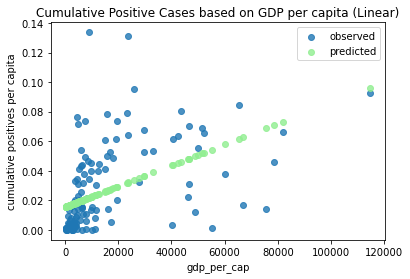

r squared: 0.242


In [3]:
pos_gdp_regressor = LinearRegression()

pos_gdp_reshapeX = np.reshape(covid_data[['gdp_per_cap']], (-1, 1))


pos_gdp_regressor.fit(pos_gdp_reshapeX, covid_data['cpos_norm'])

pos_gdp_pred = pos_gdp_regressor.predict(pos_gdp_reshapeX)

plt.scatter(pos_gdp_reshapeX, covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(pos_gdp_reshapeX, pos_gdp_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on GDP per capita (Linear)')
plt.xlabel('gdp_per_cap')
plt.ylabel('cumulative positives per capita')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.3f}".format(pos_gdp_regressor.score(pos_gdp_reshapeX, covid_data['cpos_norm'])))

#### 2: Predict cumulative positive COVID cases per capita (Y) based on Gini index (X) [Linear Regression]

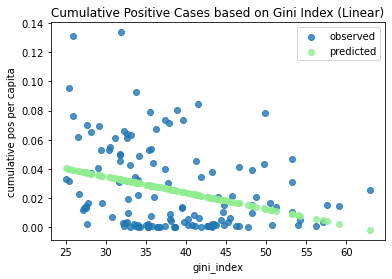

r squared: 0.10


In [4]:
pos_gini_regressor = LinearRegression()

pos_gini_reshapeX = np.reshape(covid_data[['gini_index']], (-1, 1))


pos_gini_regressor.fit(pos_gini_reshapeX, covid_data['cpos_norm'])

pos_gini_pred = pos_gini_regressor.predict(pos_gini_reshapeX)

plt.scatter(pos_gini_reshapeX, covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(pos_gini_reshapeX, pos_gini_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Gini Index (Linear)')
plt.xlabel('gini_index')
plt.ylabel('cumulative pos per capita')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.2f}".format(pos_gini_regressor.score(pos_gini_reshapeX, covid_data['cpos_norm'])))

#### 3: Predict cumulative positive COVID cases per capita (Y) based on population density (X) [Linear Regression]

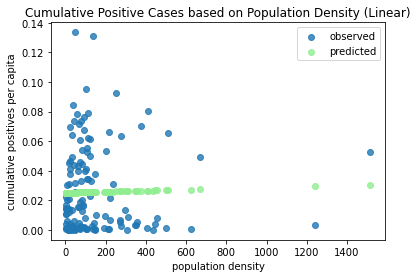

r squared: 0.0006


In [5]:
pos_den_regressor = LinearRegression()

pos_den_regressor.fit(covid_data[['pop_density']], covid_data['cpos_norm'])

pos_den_pred = pos_den_regressor.predict(covid_data[['pop_density']])

%matplotlib inline
plt.scatter(covid_data['pop_density'], covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(covid_data['pop_density'], pos_den_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Population Density (Linear)')
plt.xlabel('population density')
plt.ylabel('cumulative positives per capita')
plt.legend(['observed', 'predicted'])
plt.show()
print("r squared: {:.4f}".format(pos_den_regressor.score(covid_data[['pop_density']], covid_data['cpos_norm'])))

#### 4: Predict cumulative positive COVID cases per capita (Y) based on unemployment rates (X) [Linear Regression]

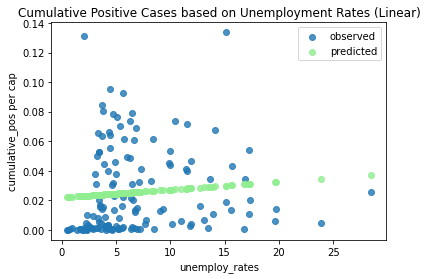

r squared: 0.0083


In [6]:
pos_rates_regressor = LinearRegression()

pos_rates_regressor.fit(covid_data[['unemploy_rates']], covid_data['cpos_norm'])

pos_rates_pred = pos_rates_regressor.predict(covid_data[['unemploy_rates']])

plt.scatter(covid_data[['unemploy_rates']], covid_data['cpos_norm'], alpha = 0.8)
plt.scatter(covid_data[['unemploy_rates']], pos_rates_pred, c ='lightgreen', alpha = 0.8)
plt.title('Cumulative Positive Cases based on Unemployment Rates (Linear)')
plt.xlabel('unemploy_rates')
plt.ylabel('cumulative_pos per cap')
plt.legend(['observed', 'predicted'])

plt.show()
print("r squared: {:.4f}".format(pos_rates_regressor.score(covid_data[['unemploy_rates']], covid_data['cpos_norm'])))

#### 5: Using GDP per capita, Gini index, population density, and unemployment rates to predict the cumulative positive COVID cases per capita [Multivariable Regression]

In [7]:
multi_model = LinearRegression()
multi_model.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cpos_norm'])
print('gdp_per_cap coefficient: {:.3E}'.format(multi_model.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model.coef_[3]))

score = multi_model.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cpos_norm'])
print('r squared: {:.4f}'.format(score))

gdp_per_cap coefficient: 6.376E-07
gini_index coefficient: -7.082E-04
population density coefficient: -4.363E-07
unemployment rates coefficient: 1.140E-03
r squared: 0.2982


#### 6: Using GDP per capita, Gini index, population density, and unemployment rates to predict COVID deaths per capita [Multivariable Regression]

In [8]:
multi_model_dec = LinearRegression()
multi_model_dec.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cdec_norm'])
print('gdp_per_cap coefficient: {:.3E}'.format(multi_model_dec.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model_dec.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model_dec.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model_dec.coef_[3]))

score_dec = multi_model_dec.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['cdec_norm'])
print('r squared: {:.4f}'.format(score_dec))

gdp_per_cap coefficient: 1.026E-08
gini_index coefficient: -1.194E-05
population density coefficient: -1.663E-07
unemployment rates coefficient: 1.954E-05
r squared: 0.1914


#### 7: Using GDP per capita, Gini index, population density, and unemployment rates to predict ratio of COVID deaths to COVID positives [Multivariable Regression]

In [9]:
multi_model_ratio = LinearRegression()
multi_model_ratio.fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['dec_pos_ratio'])


print('gdp_per_cap coefficient: {:.3E}'.format(multi_model_ratio.coef_[0]))
print('gini_index coefficient: {:.3E}'.format(multi_model_ratio.coef_[1]))
print('population density coefficient: {:.3E}'.format(multi_model_ratio.coef_[2]))
print('unemployment rates coefficient: {:.3E}'.format(multi_model_ratio.coef_[3]))

score_ratio = multi_model_ratio.score(covid_data[['gdp_per_cap', 'gini_index', 'pop_density','unemploy_rates']], covid_data['dec_pos_ratio'])
print('r squared: {:.4f}'.format(score_ratio))

gdp_per_cap coefficient: -3.696E-08
gini_index coefficient: 1.007E-04
population density coefficient: -5.800E-06
unemployment rates coefficient: 6.896E-05
r squared: 0.0244


## Evaluation of Significance

#### Train test split
Here we use train_test_split to split our data into a "train" portion (80%) and a "test" portion (the remaining 20%).  We fit a linear model to the train data, and see how well it performs comparatively on the test data.  This tests whether our model is overfitted to our data.  

In [10]:
n_tts = 100
test_scores = []
train_scores = []

for i in range(n_tts):
    train_gdp, test_gdp, train_pos, test_pos = train_test_split(covid_data["gdp_per_cap"]
                                                            , covid_data['cpos_norm'], test_size = 0.20)
    regressor_gdp = LinearRegression().fit(np.array(train_gdp).reshape(-1,1), train_pos)
    train_scores.append(regressor_gdp.score(np.array(train_gdp).reshape(-1,1), train_pos))
    
    #how well can we predict the test set?
    accuracy_test = regressor_gdp.score(np.array(test_gdp).reshape(-1,1), test_pos)
    test_scores.append(accuracy_test)

abs_difference = []
for i in range(n_tts):
    abs_difference.append(abs(train_scores[i]-test_scores[i]))

avg_diff = np.mean(abs_difference)
avg_test_score = np.mean(test_scores)
avg_train_score = np.mean(train_scores)

print("Average r squared for train datasets: {:.3f}\nAverage r squared for test datasets: {:.3f}\nAverage difference in test and train scores: {:.3f}".format(avg_train_score,avg_test_score,avg_diff))

Average r squared for train datasets: 0.238
Average r squared for test datasets: 0.220
Average difference in test and train scores: 0.143


In [11]:
#Train test split for multivariable regression: predicting cpos_norm from GDP per capita,
#Gini index, population density, and unemployment rates
n_tts2 = 100
multi_test_scores = []
multi_train_scores = []

for i in range(n_tts2):
    train_multi, test_multi = train_test_split(covid_data, test_size = 0.20)
    regressor_multi = LinearRegression().fit(train_multi[['gdp_per_cap', 'gini_index'
                                                     , 'pop_density', 'unemploy_rates']], train_multi['cpos_norm'])
    multi_train_scores.append(regressor_multi.score(train_multi[['gdp_per_cap', 'gini_index'
                                                     , 'pop_density', 'unemploy_rates']], train_multi['cpos_norm']))
    #testing
    multi_test_scores.append(regressor_multi.score(test_multi[['gdp_per_cap', 'gini_index', 'pop_density', 'unemploy_rates']],test_multi['cpos_norm']))

m_abs_difference = []
for i in range(n_tts2):
    m_abs_difference.append(abs(multi_train_scores[i]-multi_test_scores[i]))

avg_diff2 = np.mean(m_abs_difference)
avg_test_score2 = np.mean(multi_test_scores)
avg_train_score2 = np.mean(multi_train_scores)

print("Average r squared for train datasets: {:.3f}\nAverage r squared for test datasets: {:.3f}\nAverage difference in test and train scores: {:.3f}".format(avg_train_score2,avg_test_score2,avg_diff2))

Average r squared for train datasets: 0.310
Average r squared for test datasets: 0.181
Average difference in test and train scores: 0.195


## Permutation test
Here, we perform a permutation test for analysis 5: Using GDP per capita, gini index, population density, and unemployment rates to predict the cumulative positive COVID cases per capita. The purpose here is to test the null hypothesis, the chance that the trend we found is a result of random chance.  

In [13]:
# creating a function to randomize outputs
def permute(input_array):
    # shuffle is inplace, so copy to preserve input
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

n_perm = 10000
gdp_perm_coefs = []
gini_perm_coefs = []
pop_perm_coefs = []
rates_perm_coefs = []

for i in range(n_perm):
    perm = permute(np.array(covid_data[["cpos_norm"]]))
    perm_model = LinearRegression().fit(covid_data[['gdp_per_cap', 'gini_index', 'pop_density', 'unemploy_rates']],perm)
    gdp_perm_coefs.append(perm_model.coef_[0,0])
    gini_perm_coefs.append(perm_model.coef_[0,1])
    pop_perm_coefs.append(perm_model.coef_[0,2])
    rates_perm_coefs.append(perm_model.coef_[0,3])

Actual GDP coefficient: 6.376E-07
Percentage of coefficients equal to or greater than this: 0.0000%


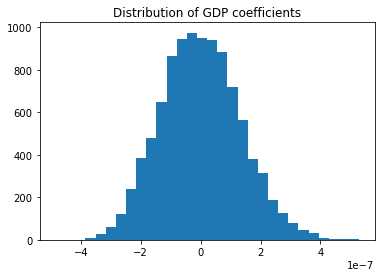

In [14]:
#figuring out percent chance that gdp coefficient would result from random chance
count_gdp = 0
for i in gdp_perm_coefs:
    if i >= 6.376 * 10 **- 7:
        count_gdp += 1
perc_gdp = count_gdp/n_perm * 100

        
plt.hist(gdp_perm_coefs, bins = 30);
plt.title("Distribution of GDP coefficients");
print("Actual GDP coefficient: 6.376E-07\nPercentage of coefficients equal to or greater than this: {:.4f}%".format(perc_gdp))

Actual gini coefficient: -7.082E-04
Percentage of coefficients equal to or less than this: 1.74%


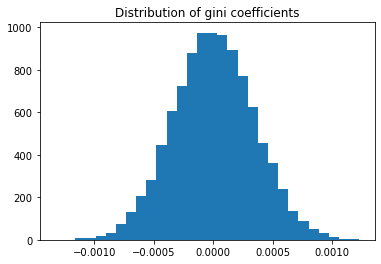

In [16]:
#figuring out percent chance that gini coefficient would result from random chance
count_gini = 0
for i in gini_perm_coefs:
    if i <=- 7.082 * 10 **- 4:
        count_gini += 1
perc_gini = count_gini / n_perm * 100

plt.hist(gini_perm_coefs, bins = 30);
plt.title("Distribution of gini coefficients");
print("Actual gini coefficient: -7.082E-04\nPercentage of coefficients equal to or less than this: {:.2f}%".format(perc_gini))

Actual population density coefficient: -4.363E-07
Percentage of coefficients equal to or less than this: 51.61%


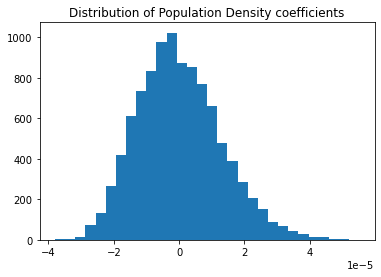

In [15]:
#figuring out percent chance that population density coefficient would result from random chance
count_pop = 0
for i in pop_perm_coefs:
    if i <=- 4.363 * 10 **- 7:
        count_pop += 1
perc_pop = count_pop / n_perm * 100

plt.hist(pop_perm_coefs, bins = 30);
plt.title("Distribution of Population Density coefficients");
print("Actual population density coefficient: -4.363E-07\nPercentage of coefficients equal to or less than this: {:.2f}%".format(perc_pop))

Actual Unemployment Rate coefficient: 1.140E-03
Percentage of coefficients equal to or greater than this: 1.81%


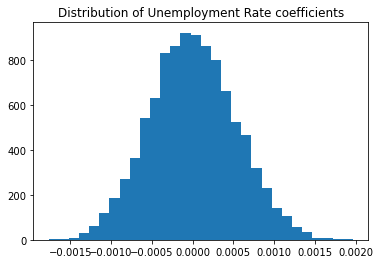

In [17]:
#figuring out percent chance that unemployment rate coefficient would result from random chance
count_rates = 0
for i in rates_perm_coefs:
    if i >= 1.14 * 10 **- 3:
        count_rates += 1
perc_rates = count_rates / n_perm * 100

plt.hist(rates_perm_coefs, bins = 30);
plt.title("Distribution of Unemployment Rate coefficients");
print("Actual Unemployment Rate coefficient: 1.140E-03\nPercentage of coefficients equal to or greater than this: {:.2f}%".format(perc_rates))

In [54]:
covid_data.head()

,Unnamed: 0,date,country_code,continent,cumulative_pos,cumulative_dec,curr_pos,gdp_per_cap,gini_index,gini_year,population,pop_density,unemploy_rates,dec_pos_ratio,cpos_norm,cdec_norm
0,0,2021-03-13,ALB,EU,116821,2030,34970.0,5353.244856,29.0,2012,2854191.0,104.612263,11.47,0.017377,0.040930,0.000711
1,1,2021-02-15,DZA,AF,110711,2939,107772.0,3973.964072,27.6,2011,43053054.0,17.730068,11.81,0.026547,0.002572,0.000068
2,2,2021-02-15,AGO,AF,20366,492,19874.0,2790.726615,42.7,2008,31825295.0,24.713052,6.93,0.024158,0.000640,0.000015
3,3,2021-02-15,ARG,SA,2029008,50327,1978681.0,9912.281809,41.2,2017,44938712.0,16.258510,9.84,0.024804,0.045151,0.001120
4,4,2021-02-15,AUS,OC,28900,909,27991.0,55060.326100,35.8,2014,25364307.0,3.247871,5.16,0.031453,0.001139,0.000036


## Interpretation and Conclusions
#### Linear Regressions: 
Before performing a multivariable regression, we initially tried predicting the cumulative positive COVID cases per capita based on GDP per capita, Gini index, population density, and unemployment rates separately (analyses 1, 2, 3, and 4). The closer that an $r^2$ score is to 1.0, or 100%, the more significant the model would be.  The $r^2$ scores of predicting positive COVID cases based on population density and unemployment rates separately were very small (0.0006 and 0.0083, respectively).  This shows that these two predictors alone do not tell us much about cumulative COVID cases per capita.  The $r^2$ scores of predicting positive COVID cases based on GDP per capita and Gini index were 0.242 and 0.10, respectively.  These values show a low correlation, but are not completely negligible, particularly the cumulative positives vs GDP model.  Surprisingly, we found that countries with higher GDPs were more likely to have higher COVID rates.  
To assess the significance of the GDP per capita vs cumulative positive covid cases per capita, we used train test split to see if our model was overfitted.  Since the average $r^2$ value for the trained group was significantly higher than the average $r^2$ value for the test group (0.245 vs 0.195), this signifies that this model may be overfitted.

#### Multivariable Regressions:
When trying to use the GDP per capita, Gini index, unemployment rates, and population density to predict the cumulative positive cases of a country, the resulting $r^2$ score from the multivariable regression was 0.2982 (analysis 5). This is a small correlation, but still signifies a trend. 

We also tried to predict the cumulative number of deaths from COVID per capita based on the GDP per capita, Gini index, unemployment rate, and population density of countries (analysis 6), however this resulted in a lower $r^2$ score of 0.1914. Lastly, in one final multi-model, we took the same predictors to try and predict the ratio of cumulative positive cases to the cumulative number of deceased people from COVID (analysis 7).  But, the model resulted in an even lower $r^2$ score of around 0.0244. This was less significant than the both of the prior multi-models. 
Applying these results to the real-world context, it would mean that even though we may have assumed that countries with a lower GDP per capita and Gini index might have more cumulative positive cases or cumulative deceased people from COVID compared to countries with higher values, based on the multi-models these were incorrect assumptions to make. All three of the regressions performed ended up being insignificant, which showed that a country's GDP and Gini index has close to no effect on their cumulative number of COVID cases as well as deaths. 
To assess the significance of this, we used train test split to see if our model was overfitted.  Since the average $r^2$ value for the trained group was significantly higher than the average $r^2$ value for the test group (0.304 vs 0.194), this signifies that this model may be overfitted.

We used permutation testing to test the chances that the trends we found in our most robust model (analysis 5) occured by chance.  We did so by shuffling the covid positives cases, assigning random rates to countries 10,000 times and looking at the coefficients for each variable in these cases.  We found that the likelihood of getting a GDP coefficient greater than or equal to what we found, 6.376E-07, was 0%.  This means that not a single one of our random permutations produced a slope greater than or equal to this for GDP per capita.  For Gini index, 1.62% of the randomly permuted slopes were less than or equal to our actual slope of -7.082E-04.  For unemployment rates, 1.97% of the randomly permuted slopes were greater than the actual slope of 1.140E-03.  This signifies that all of these coefficients were significant and were very unlikely to have occured from chance.  For population density, there was a high likelihood of a random slope being greater than our observed slope of -4.363E-07, which means that our slope was not statistically significant.  

#### ANOVA Testing: 

## Limitations
- Not all countries have reported a Gini index, GDP per capita, population, population density, or unemployment rate value, so this is not representative of the whole world.  We used 135 out of 195 countries for our analysis.
- Some countries’ values are more up-to-date than others.
- Some countries may also have low life expectancies due to many social, political and environmental factors. A country’s high COVID death rate may thus also be influenced by its low life expectancy.
- Some countries might have less accurate COVID data than others.
- Because the original dataset is updated daily, the dataset we have saved will not have all current COVID data, and may not be accurate to the present day. 
- Policy and government response likely influences COVID rates significantly, but we did not account for this in our analysis.
- Some countries may have had more testing, which could have also effected the number of reported cumulative cases/deaths.

## Source Code
All code was shared in the following Google Drive folder, in addition to having the prior project phases. 
https://drive.google.com/drive/folders/1OAunMYE2SKDuoehcmpewYIPKlBWcg3fU?usp=sharing


The data was sourced from the following sites:

Covid data source: https://github.com/ec-jrc/COVID-19/blob/master/data-of-world/jrc-covid-19-world-latest.csv  
This dataset contains COVID-19 data of each country in the world, with columns such as cumulative positive cases and hospitalizations.  

Gini index data source: https://data.worldbank.org/indicator/SI.POV.GINI/?end=2018&start=2015 
This dataset contains the Gini index for each country for which it is available.

GDP per capita data source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 
note: for this data set, we had to remove the final column (2020), which had no data in it to avoid errors.  This dataset contains the gross domestic product per capita of each country.

Population data source: https://data.worldbank.org/indicator/SP.POP.TOTL 
This dataset contains the population for each country for which it is available.

Population density data source: https://data.worldbank.org/indicator/EN.POP.DNST
This dataset contains the population density for each country for which it is available.

Unemployment rates data source: https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS
This dataset contains the unemployment rate for each country for which it is available.

## Acknowledgements

* Code from INFO 2950 lectures inspired our code in several places, including the train test split method. 